
# <center>Python - Graphs<a class="tocSkip"></center>
# <center>QTM 350: Data Science Computing <a class="tocSkip"></center>    
# <center>Davi Moreira <a class="tocSkip"></center>

## Introduction <a class="tocSkip">
<hr>


This topic material is based on [Professor Mike Gelbart Algorithms and Data Structures course](https://github.com/UBC-MDS/DSCI_512_alg-data-struct). It was adapted for our purposes.

In [1]:
import numpy as np
import networkx as nx 
from collections import Counter

In [2]:
# The defaults are hard to see on a projector in class
draw_params = {"node_color" : "pink", "font_size" : 20, "with_labels" : True, "arrowsize" : 30}

Outline:

- Graphs intro 
- Graph types 
- Graph searches: recursive implementation 
- Stacks and queues 
- Graph searches: iterative implementation 
- Activities (time-permitting)

## Learning objectives

- Map real-world problems to various kinds of graphs (directed/undirected, weighted/unweighted).
- Perform breadth-first and depth-first searches in graphs.
- Compare/contrast BFS and DFS.
- Use Stack and Queue data structures in implementing DFS and BFS.
- Find the running times of graph algorithms as a function of the number of vertices and edges in a graph.

## Graphs intro

Trees allowed us to represent hierarchical relationships. However, many relationships are not hierarchical:

- friendships (on Facebook, Twitter, or in real life)
- connections between machines on the internet
- direct flight connections between airports
- etc.

A graph consists of: 

- A set of _vertices_ or _nodes_
- A set of pairs of vertices, called _edges_

In [3]:
G = nx.Graph()

G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")

G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("C", "D")
G.add_edge("D", "E")
G.add_edge("E", "A")
G.add_edge("A", "C")
G.add_edge("B", "D")
G.add_edge("C", "E")

- The graph package we're using, `networkx`, randomly visalizes the graph each time.
    - By re-running the next cell, we can see a few equivalent representations.
    - They are all the same graph!
    - See [`networkx.draw` documentation](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html).
    - Note: if you are interested, there's an Altair interface to `networkx`: [nx_altair](https://github.com/Zsailer/nx_altair).

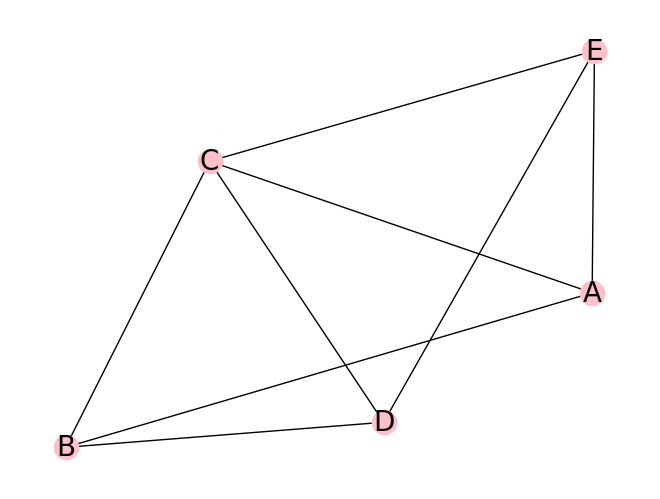

In [6]:
nx.draw(G, **draw_params, arrows=True)

Note: we can set the random seed if we want a fixed drawing:

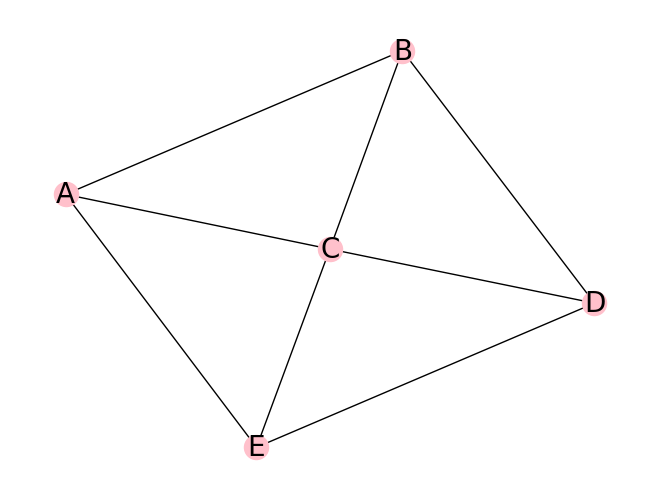

In [10]:
nx.draw(G, **draw_params, pos=nx.spring_layout(G, seed=5))

Some graph terminology:

- The _degree_ of a vertex is the number of edges connected to it.
  - Above, "B" has degree 3 and "C" has degree 4.
- A graph is _complete_ if every pair of vertices is joined by an edge.
  - The graph above is not complete because "B" and "E" are not directly connected (same with "A" and "D").

We can make it complete as follows:

In [11]:
G.add_edge("A", "D")
G.add_edge("B", "E")

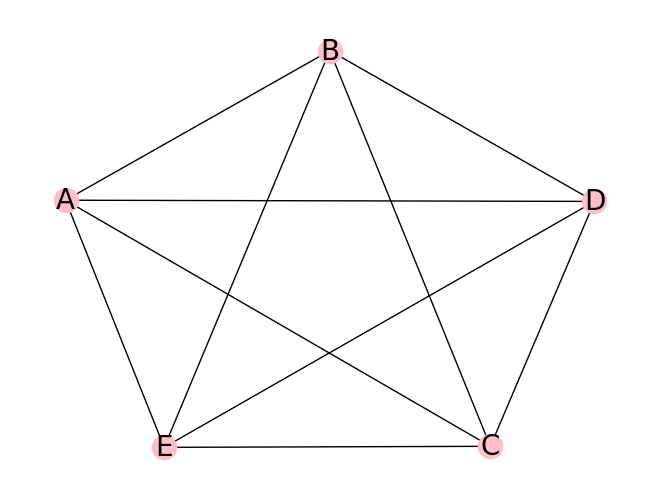

In [12]:
nx.draw(G, **draw_params, pos=nx.spring_layout(G, seed=5))

Below is another example of a complete graph, this time with 4 vertices.

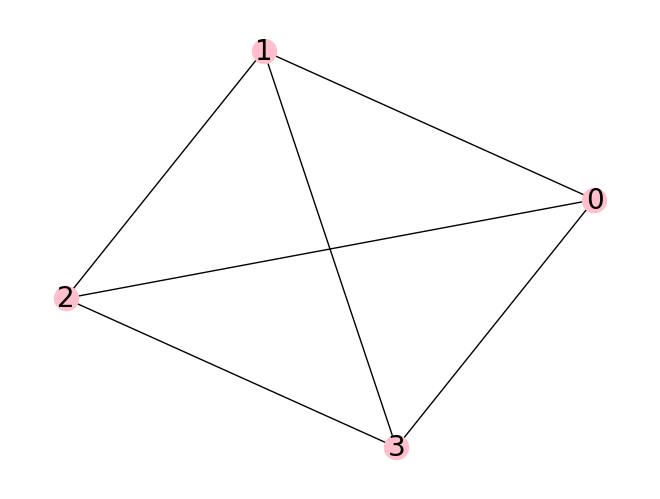

In [13]:
complete = nx.complete_graph(4)

nx.draw(complete, **draw_params)

More terminology:

- A graph is _connected_ if there is exists a path between any pair of nodes.
  - Below is an example disconnected graph. 

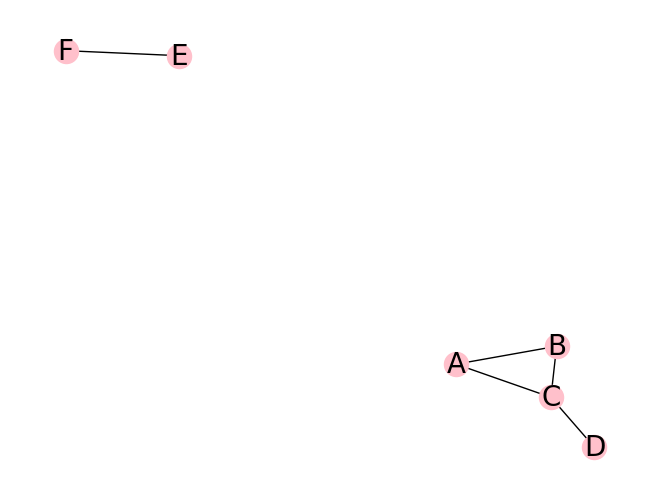

In [14]:
disconnected = nx.Graph()

disconnected.add_node("A")
disconnected.add_node("B")
disconnected.add_node("C")
disconnected.add_node("D")
disconnected.add_node("E")
disconnected.add_node("F")

disconnected.add_edge("A", "B")
disconnected.add_edge("A", "C")
disconnected.add_edge("D", "C")
disconnected.add_edge("B", "C")

disconnected.add_edge("E", "F")

nx.draw(disconnected, **draw_params)

## Graph types

#### Undirected graphs

- This is what we've been looking at so far.
- Saying "there is an edge from A to B" is the same as saying "there is an edge from B to A"
- You can try this out in `networkx`.

### Directed graphs

- Sometimes, relationships are directed (e.g. Twitter).
- This gives us a directed graph. We typically draw the direction with an arrow.
- Example:


In [15]:
G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("B", "C")
G.add_edge("A", "C")

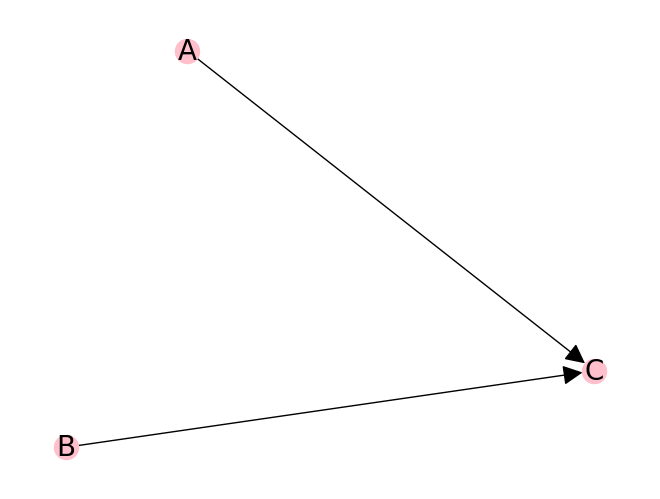

In [16]:
nx.draw(G, **draw_params)

Now let's reverse the direction of the edge from "B" to "C":

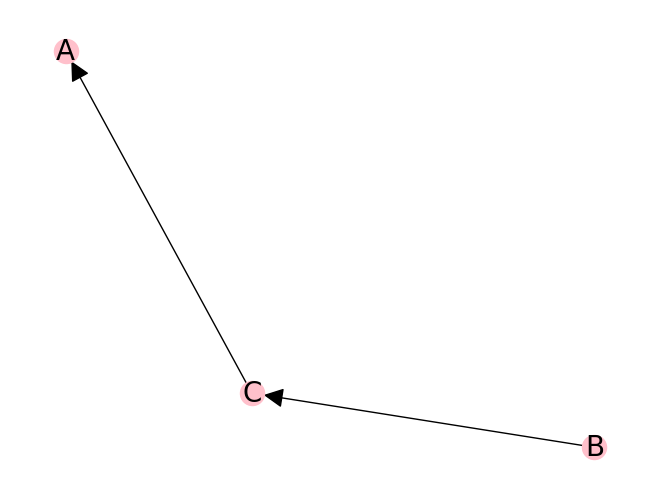

In [17]:
G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("B", "C")
G.add_edge("C", "A")

nx.draw(G, **draw_params)

- This is a fundamentally different graph. 
- The choice of graph type depends on the situation you're modelling. 
  - The MDS prerequisite graph is directed.

![](mds.png)

- Note that this is a directed graph, NOT a tree, because nodes can have multiple parents.

- Directed graphs can also have reciprocal connections:

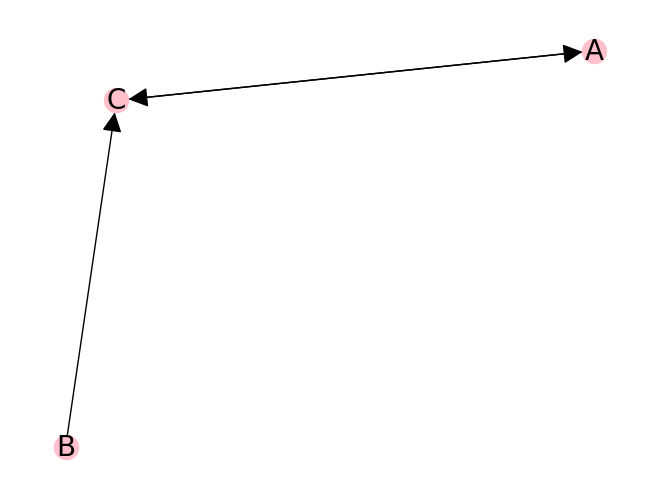

In [18]:
G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("B", "C")

# add a 2-way edge
G.add_edge("C", "A")
G.add_edge("A", "C")

nx.draw(G, **draw_params)

- Here, we have a double-headed arrow between A and C. 
- In an undirected graph, it wouldn't have made sense to have both 

```python
G.add_edge("C", "A")
G.add_edge("A", "C")
```

because one would be sufficient.

- Directed graphs also can have self-connections.
  - `networkx` supports them but it doesn't draw them properly.


### Unweighted graphs

All the graphs above are "unweighted" because all edges are equal.

### Weighted graphs

Both undirected and directed graphs can have weighted edges.

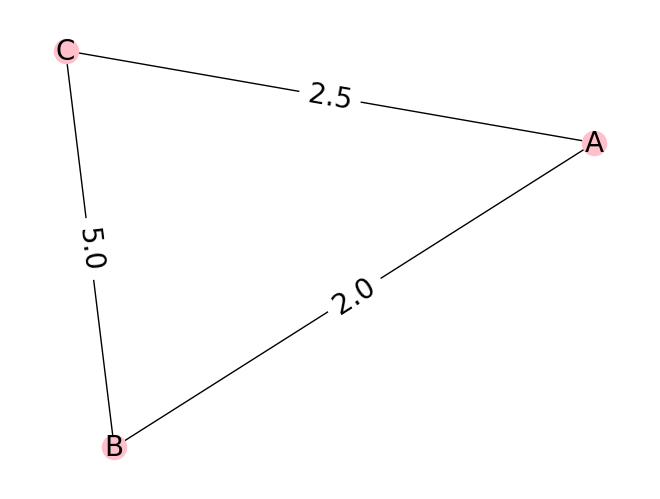

In [19]:
G = nx.Graph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("A", "B", weight=2.0)
G.add_edge("B", "C", weight=5.0)
G.add_edge("C", "A", weight=2.5)

pos = nx.spring_layout(G)
nx.draw(G, pos, **draw_params)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=20);

Above: undirected, weighted graph.

Below: directed, weighted graph.

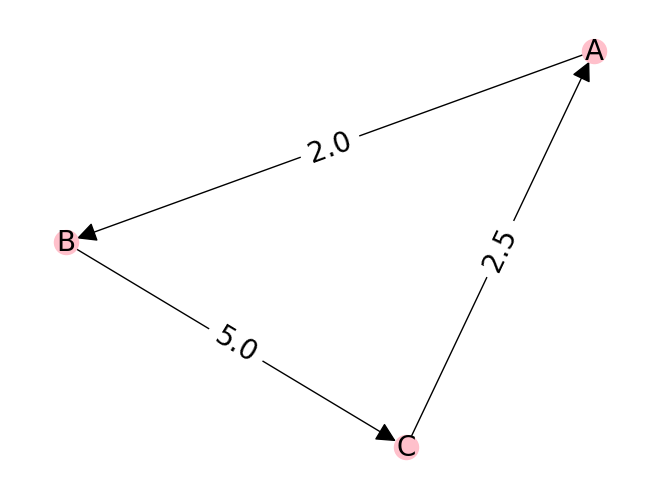

In [20]:
G = nx.DiGraph()

G.add_node("A")
G.add_node("B")
G.add_node("C")

G.add_edge("A", "B", weight=2.0)
G.add_edge("B", "C", weight=5.0)
G.add_edge("C", "A", weight=2.5)

pos = nx.spring_layout(G)
nx.draw(G, pos, **draw_params)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=20);

Examples where graphs can be used to model a situation:

- Flights between airports: weights can be cost or flight time between destinations.
  - Now we definitely want a directed graph, as the cost/time may depend on the direction.
  - Useful problem: minimum cost path from $A$ to $B$. This is called the [shortest path problem](https://en.wikipedia.org/wiki/Shortest_path_problem).
- Countries.
  - Edge weights could be number of dual citizens (undirected).
  - Or trade/immigration in each direction (directed).
  - The weights could be the trade volume.

## Graph searches: recursive implementation 

Next, we'll discuss some algorithms performed on graphs.

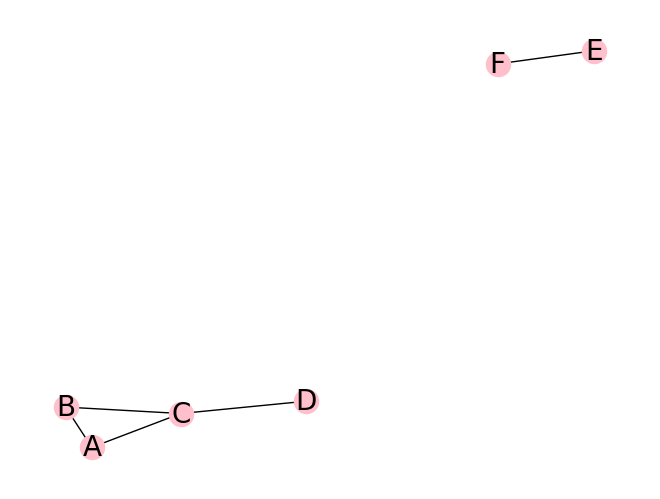

In [21]:
# pappus = nx.pappus_graph()
# nx.draw(pappus, with_labels=True, arrowsize=40)

# erg = nx.erdos_renyi_graph(15, 0.2, seed=40)
# nx.draw(erg, **draw_params, pos=nx.spring_layout(erg, seed=5))

nx.draw(disconnected, **draw_params)

- Question: are nodes $A$ and $E$ connected?
  - We can see this easily with our eyes.
  - But imagine a dataset with millions of nodes and billions of edges, like a Facebook social network (see lab).
  - We can't "eyeball" if two people are connected; we need an algorithm.
- Approach: visit all neighbours of node $0$, then all neighbours of these neighbours, etc.
  - Keep track of which nodes have already been visited so we don't get stuck in an infinite cycle.

In [22]:
def connected(g, node1, node2, visited=None, verbose=False):
    """ 
    Check whether node1 and node2 are connected in the graph g (using DFS).

    Parameters
    ----------
    g : networkx.classes.graph.Graph
        the graph
    node1 : str, int
        first node
    node2 : str, int
        second node
    visited : set
        contains visited nodes (default is None)
    verbose : bool
        if True, node location will be displayed (default is False)
    
    Returns
    -------
    bool 
        True if the two nodes are connected and False otherwise     

    Example
    --------
    >>> graph = nx.erdos_renyi_graph(2, 1)
    >>> connected(graph, 1, 0)
    True
    """
    if visited is None:
        visited = {node1}  # initialize

    if node1 == node2:
        return True

    # for all the unvisited neighbours of node1
    for v in g.neighbors(node1):
        if v in visited:
            continue
            
        visited.add(v)

        if verbose:
            print("At node", v)

        # If a connection found, passes the True value all the way up to the top level.
        if connected(g, v, node2, visited, verbose):
            return True
    
    if verbose:
        print("hello this is", node1, "speaking. couldn't get there, sorry :(")
    return False

Let's discuss how the code works:

- We keep track of all nodes that we've visited, so that we don't visit them again.
- Base case: if the start node equals the end node, return True.
- For all *unvisited* the neighbours of the start node:
  - Add to visited set
  - Recursively check if these nodes are connected to the start node
- If you finish the loop and don't find anything, return False.

Detailed explanation:
    
The function `connected` determines if two nodes, `node1` and `node2`, are connected in a graph `g`. The function employs a `Depth-First Search (DFS)` approach to traverse the graph, which is a common technique for exploring the entirety of a graph or searching for specific elements within it. 

- **The function `connected` takes five parameters:**

  - `g`: The graph in which to check connectivity, assumed to be an instance of a `networkx` graph.
  - `node1` and `node2`: The nodes between which connectivity is to be checked. These can be any hashable types typically used as graph nodes (like strings or integers).
  - `visited`: A set that tracks the nodes that have been visited during the DFS. It defaults to `None` if not provided.
  - `verbose`: A boolean flag that, when set to `True`, enables the printing of debug statements about the function's progress.

- **Initialization of `visited` Set**: This part of the code initializes the `visited` set with `node1` if no `visited` set has been passed to the function. This is crucial to prevent the function from revisiting the same nodes, which can lead to infinite recursion or redundant operations.

- **Base Case for Recursion**: If `node1` is the same as `node2`, the function returns `True` immediately, indicating that a node is trivially connected to itself.

- **DFS Traversal**: This loop iterates through each neighbor `v` of `node1`. If `v` has already been visited, it skips to the next neighbor. Otherwise, it adds `v` to the `visited` set and, if `verbose` is `True`, prints the current node. It then makes a recursive call to `connected` to check if there is a path from `v` to `node2`. If such a path exists (`connected(g, v, node2, visited, verbose)` returns `True`), the function immediately returns `True`, signaling that `node1` and `node2` are connected.

- **Verbose Output for Unsuccessful Search**: If no connection is found after exploring all neighbors, and if `verbose` is `True`, the function prints a message indicating that it could not find a path from `node1` to `node2`.

- **Return Value**: If the function exits the loop without having returned `True`, it returns `False`, indicating that no path exists between `node1` and `node2`.

This method of traversal ensures that the function thoroughly explores all possible paths between `node1` and `node2` in the graph. The `visited` set is crucial to avoid cycles and redundant checks, making the function efficient in terms of avoiding unnecessary work. The optional `verbose` parameter allows for detailed debugging.

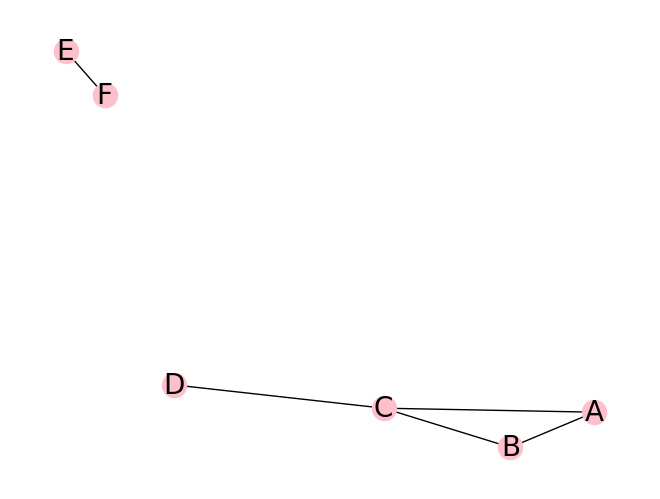

In [23]:
nx.draw(disconnected, **draw_params)

In [24]:
connected(disconnected, "A", "B")

True

In [25]:
connected(disconnected, "A", "E")

False

In [26]:
assert connected(disconnected, "A", "B")
assert connected(disconnected, "A", "C")
assert connected(disconnected, "A", "D")
assert connected(disconnected, "B", "C")
assert connected(disconnected, "B", "D")
assert connected(disconnected, "E", "F")
assert not connected(disconnected, "A", "E")
assert not connected(disconnected, "A", "F")
assert not connected(disconnected, "D", "E")
assert not connected(disconnected, "D", "F")
assert not connected(disconnected, "C", "E")

- Question: in what order were the nodes traversed?

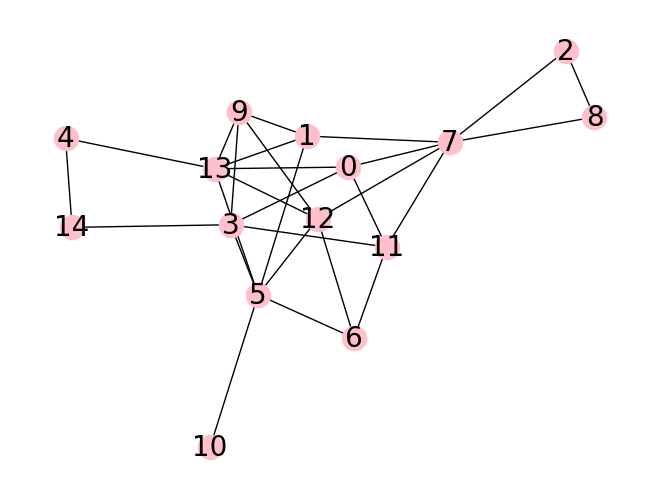

In [27]:
erg = nx.erdos_renyi_graph(15, 0.2, seed=40)
nx.draw(erg, **draw_params, pos=nx.spring_layout(erg, seed=5))

In [28]:
connected(erg, 14, 0, verbose=True)

At node 3
At node 0


True

- Note the order: 
  - It's taking 0's first neighbour, which is 3
  - Then 3's first neighbour, which is 5
  - Then 5's first neighbour, which is 1
  - This is called [depth first search](https://en.wikipedia.org/wiki/Depth-first_search) (DFS) because we go deep into the graph


- What if this was a huge graph, and the two nodes were right next to each other?
  - The algorithm might be extremely inefficient.

## Stacks and queues

- Let's briefly discuss some new data structures.
- We want a data structure that we can put things into, and then retrieve them later.
- A [stack](https://en.wikipedia.org/wiki/Stack_(abstract_data_type)) does with with the "last in, first out" (LIFO) mentality - like a stack of books or plates.

In [30]:
class Stack:
    """A stack data structure."""

    def __init__(self):
        self.data = list()

    def push(self, item):
        """
        Adds a new item to the top of the stack.
        
        Parameters
        ----------
        item : object
           An item added to the stack
        """
        self.data.append(item)

    def pop(self):
        """
        Removes the item that is at the top of the stack and returns the item.

        Returns
        -------
        object 
             The item that was last added to the stack.

        Examples
        --------
        >>> stack = Stack()
        >>> stack.push(1)
        >>> stack.push([1, 2, "dog"])
        >>> stack.push("popcorn")
        >>> stack.pop()
        'popcorn'
        """
        return self.data.pop()

    def isEmpty(self):
        """ 
        Checks to see if the stack is empty.

        Returns
        -------
        bool 
             True if the stack contains no items, False otherwise.    

        Example
        --------
        >>> stack = Stack()
        >>> stack.isEmpty()
        True
        """
        return len(self.data) == 0
    
    def __str__(self):
        return self.data.__str__()

Here's a detailed explanation of the class `Stack` and its methods:

- **Constructor:** The `__init__` method is the constructor for the `Stack` class. It initializes a new instance of the class with an attribute `data`, which is an empty list that will hold the stack's elements.

- **Push Method:** The `push` method takes an argument `item` and appends it to `self.data`, effectively pushing it onto the top of the stack.

- **Pop Method:** The `pop` method removes the last item from `self.data` and returns it. If `pop` is called on an empty stack, it would raise an `IndexError`, unless handled otherwise.

- **isEmpty Method:** The `isEmpty` method returns `True` if the stack is empty (i.e., if `self.data` has a length of zero) and `False` otherwise.

- **String Representation Method:** The `__str__` method provides a human-readable string representation of the stack. When an instance of `Stack` is passed to the `print()` function, the elements of the stack will be printed in the list format.


In [31]:
s = Stack()

s.push("first")
s.push("second")

print(s)

['first', 'second']


In [32]:
s.pop()

'second'

In [33]:
print(s)

['first']


In [34]:
s.push("third")
s.push("fourth")

In [35]:
print(s)

['first', 'third', 'fourth']


In [36]:
s.pop()

'fourth'

In [37]:
s.pop()

'third'

In [38]:
s.pop()

'first'

In [39]:
s.pop()

IndexError: pop from empty list

- Along with stacks we also have [queues](https://en.wikipedia.org/wiki/Queue_(abstract_data_type)), which use "first in, first out" (FIFO) ordering.
  - e.g. an actual queue/lineup

In [40]:
class Queue:
    """A Queue data structure."""
    
    def __init__(self):
        self.data = list()

    def push(self, item):
        """
        Adds a new item to the end of the queue.
        
        Parameters
        ----------
        item : object
           An item added to the queue
        """
        
        self.data.append(item)

    def pop(self):
        """
        Removes the item that is at the front of the queue and returns the item.

        Returns
        -------
        object 
             The least recent item added to the queue.     

        Example
        --------
        >>> queue = Queue()
        >>> queue.push(1)
        >>> queue.push([1, 2, "dog"])
        >>> queue.push("popcorn")
        >>> queue.pop()
        '1'
        """
        return self.data.pop(0)

    def isEmpty(self):
        """ 
        Checks to see if the queue is empty. 

        Returns
        -------
        bool 
            True if the stack contains no items, False otherwise.    

        Example
        --------
        >>> queue = Queue()
        >>> queue.push(1)
        >>> Queue.isEmpty()
        False
        
        """
        return len(self.data) == 0
    
    def __str__(self):
        return self.data.__str__()

The class `Queue` represents a queue data structure that operates on the First In, First Out (FIFO) principle. Here's a breakdown of its components:

- **Constructor:** The `__init__` method is the constructor for the `Queue` class. It initializes a new instance with an attribute `data`, which is a Python list that will be used to store the elements of the queue.

- **Push Method:** The `push` method adds an `item` to the end of the queue, which is represented as appending the item to the end of the `self.data` list.

- **Pop Method:** The `pop` method removes and returns the item at the front of the queue, which corresponds to the first item in the list `self.data`. By using `pop(0)`, it ensures that the queue operates on FIFO principle. If `pop` is called on an empty queue, it would raise an `IndexError`.

- **isEmpty Method:** The `isEmpty` method returns `True` if the queue is empty (i.e., `self.data` is an empty list) and `False` otherwise.

- **String Representation Method:**

The `__str__` method provides a string representation of the queue for readability. When the `print()` function is used on an instance of `Queue`, it will display the elements of the queue in list format.


In [41]:
q = Queue()

q.push("first")  # often called "enqueue"
q.push("second")

print(q)

['first', 'second']


In [42]:
q.pop() # often called "dequeue"

'first'

In [43]:
print(q)

['second']


In [44]:
q.push("third")
q.push("fourth")

In [45]:
print(q)

['second', 'third', 'fourth']


In [46]:
while not q.isEmpty():
    print(q.pop())

second
third
fourth


## Graph searches: iterative implementation

- Implementation:
  - Let's implement it non-recursively this time.
  - Every time we visit a node, we add its neighbours to the queue.
  - This ensures we'll visit the all the "distance 1 neighbours" before visiting any "distance 2 neighbours".

In [48]:
def connected_bfs(g, node1, node2, verbose=False):
    """ 
    Given a NetworkX Graph g, and start node node1 
    and goal node node2, tests whether node1 and node2
    are connected in the graph g using breadth first search.
    If they are not connected, returns False.

    Parameters
    ----------
    g : networkx.classes.graph.Graph
        the graph
    node1 : str, int
        first node
    node2 : str, int
        second node
    verbose : bool
        if True, node location will be displayed while False will not
        (default is False)
    
    Returns
    -------
    bool 
        True if the two nodes are connected and False otherwise     

    Example
    --------
    >>> graph = nx.erdos_renyi_graph(2, 1)
    >>> connected_bfs(graph, 1, 0)
    True
    """
    
    q = Queue()
    q.push(node1)

    visited = {node1}

    while not q.isEmpty():
        v = q.pop()
        
        if verbose:
            print("At node", v)
            
        if v == node2:
            return True

        for v in g.neighbors(v):
            if v in visited:
                continue
#             if v not in visited:
            visited.add(v)
            q.push(v)

    return False

In [49]:
connected_bfs(erg, 0, 14)

True

In [50]:
connected_bfs(erg, 0, 14, verbose=True)

At node 0
At node 3
At node 7
At node 11
At node 13
At node 5
At node 9
At node 14


True

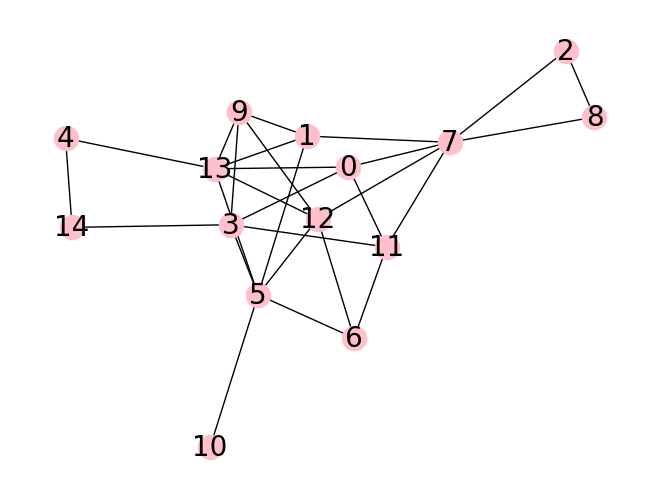

In [51]:
nx.draw(erg, **draw_params, pos=nx.spring_layout(erg, seed=5))

- The beauty is that to turn this into DFS, we only need to change the `Queue` to a `Stack`.
  - Though the neighbours will be traversed in reverse order, so it's not exactly the same as our recursive DFS. We'll consider this optional.
- BFS can be used to determine the "distance" between nodes, by keeping track of the "neighbour depth".
- Here it is in `networkx`:

In [52]:
nx.shortest_path_length(erg, 0, 14)

2

- This means it takes $2$ hops to get from node $0$ to node $14$.

In [88]:
!jupyter nbconvert _05-py-graphs.ipynb --to html --template classic --output 05-py-graphs.html

[NbConvertApp] Converting notebook _05-py-graphs.ipynb to html
[NbConvertApp] Writing 801725 bytes to 05-py-graphs.html


# <center>Thank you!<a class="tocSkip"></center>